## How much does the minimum document frequency or "sparsity" influence document similarity? 

This notebook does the following using the ten chapters plus appendix of Frederick Douglass's _Narrative of the Life of Frederick Douglass_ (1845):
    - compares similarity scores using different minimum document frequency (df) values
    - uses MDS to show (dis)similarity between chapters
    - visualizes the matrix
    - clusters together using Seaborn
    - calcuates variance between selected chapters and displays top fifty most variant terms


12/05/2018: <a href="http://www.dartmouth.edu/~jed">James E. Dobson</a> (james.e.dobson@dartmouth.edu): Created initial notebook.

In [1]:
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics.pairwise import euclidean_distances

from operator import itemgetter
import nltk
import pandas

import seaborn as sn
sn.set(style="white")
%matplotlib inline

In [2]:
texts=["Douglass/01",
       "Douglass/02",
       "Douglass/03",
       "Douglass/04",
       "Douglass/05",
       "Douglass/06",
       "Douglass/07",
       "Douglass/08", 
       "Douglass/09", 
       "Douglass/10", 
       "Douglass/11"]

In [3]:
similarity_chart=list()

# check minimum for minimum document frequencies from 1-13
for df_factor in range(1,12):
    vectorizer = CountVectorizer(input='filename', stop_words='english',
                             strip_accents='unicode',lowercase=True,
                             min_df=df_factor)
    dtm_matrix = vectorizer.fit_transform(texts)
    
    # tell us about the model
    documents, vocabulary = dtm_matrix.shape
    print("DF: {0} Documents: {1} Vocabulary: {2}".format(df_factor,documents,vocabulary))

    # calculate distances between texts
    dist_matrix = euclidean_distances(dtm_matrix.toarray())
    
    row = [df_factor]
    
    #display distance from the first text
    for x,y in sorted(enumerate(np.round(dist_matrix[0],3)), key=itemgetter(1)):
        b,d,c = texts[x].partition('/')
        v = '{0} ({1:.1f})'.format(c,y)
        row.append(v)
    similarity_chart.append(row)    

DF: 1 Documents: 11 Vocabulary: 3996
DF: 2 Documents: 11 Vocabulary: 1527
DF: 3 Documents: 11 Vocabulary: 805
DF: 4 Documents: 11 Vocabulary: 463
DF: 5 Documents: 11 Vocabulary: 287
DF: 6 Documents: 11 Vocabulary: 183
DF: 7 Documents: 11 Vocabulary: 114
DF: 8 Documents: 11 Vocabulary: 68
DF: 9 Documents: 11 Vocabulary: 38
DF: 10 Documents: 11 Vocabulary: 20
DF: 11 Documents: 11 Vocabulary: 9


In [4]:
pandas.DataFrame(similarity_chart)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,01 (0.0),06 (44.7),08 (48.0),05 (48.2),09 (49.2),03 (50.6),02 (53.2),04 (53.6),07 (55.2),11 (90.6),10 (194.7)
1,2,01 (0.0),06 (40.9),08 (43.1),05 (44.4),09 (44.6),03 (46.4),04 (47.0),02 (49.0),07 (49.2),11 (82.5),10 (185.5)
2,3,01 (0.0),06 (38.7),08 (39.7),09 (41.6),05 (41.9),03 (44.0),04 (44.3),02 (44.5),07 (45.9),11 (76.1),10 (168.4)
3,4,01 (0.0),06 (35.5),08 (36.4),09 (38.8),05 (39.4),04 (41.0),02 (41.0),03 (41.7),07 (41.7),11 (72.1),10 (162.0)
4,5,01 (0.0),06 (31.6),08 (33.2),09 (35.8),05 (36.0),07 (37.4),02 (37.5),03 (38.2),04 (38.8),11 (63.2),10 (153.4)
5,6,01 (0.0),06 (28.2),08 (29.9),09 (32.8),07 (32.9),05 (33.0),02 (34.4),03 (35.9),04 (36.8),11 (60.4),10 (146.5)
6,7,01 (0.0),06 (24.9),08 (27.4),07 (29.9),05 (30.4),09 (30.5),02 (32.0),03 (34.2),04 (34.7),11 (54.2),10 (137.1)
7,8,01 (0.0),06 (20.2),03 (22.9),08 (23.1),07 (25.1),09 (26.5),02 (27.2),05 (27.8),04 (30.0),11 (48.2),10 (128.7)
8,9,01 (0.0),06 (15.9),08 (17.8),07 (19.0),05 (19.8),03 (20.3),02 (23.5),09 (23.9),04 (27.3),11 (31.7),10 (119.4)
9,10,01 (0.0),06 (14.0),07 (14.6),08 (14.7),05 (15.1),03 (17.7),02 (19.0),09 (19.5),04 (26.1),11 (29.1),10 (110.8)


In [5]:
# recalculate with no minimum df
df_factor=1
vectorizer = CountVectorizer(input='filename',stop_words='english',
                             strip_accents='unicode',lowercase=True,
                             min_df=df_factor)
dtm_matrix = vectorizer.fit_transform(texts)
    
# tell us about the model
documents, vocabulary = dtm_matrix.shape
print("DF: {0} Documents: {1} Vocabulary: {2}".format(df_factor,documents,vocabulary))

# calculate distances between texts
dist_matrix = euclidean_distances(dtm_matrix.toarray())

DF: 1 Documents: 11 Vocabulary: 3996


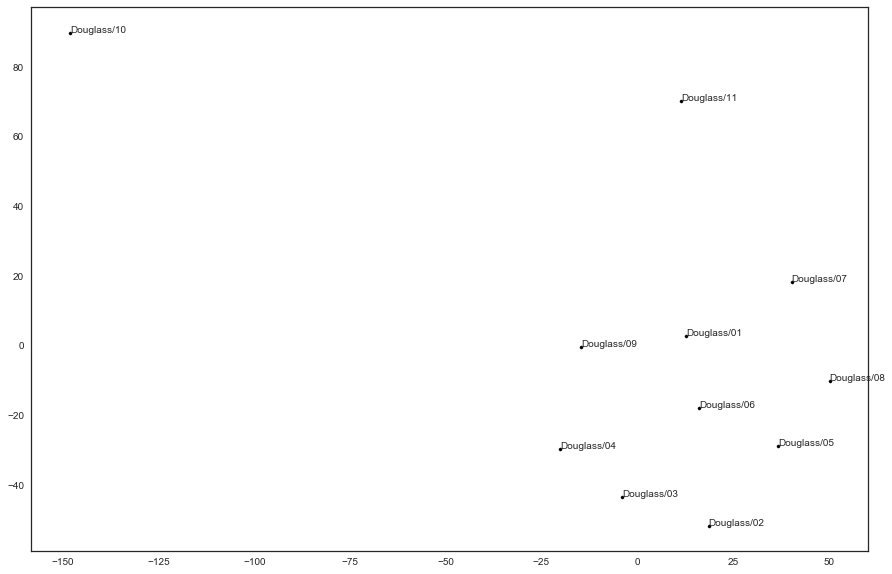

In [6]:
# reduce using MDS 
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="euclidean", random_state=1)
pos = mds.fit_transform(dtm_matrix.toarray())

# plot!
import matplotlib.pyplot as plt
xs, ys = pos[:, 0], pos[:, 1]
fig = plt.figure(figsize=(15, 10),)

for x, y, text in zip(xs, ys, texts):
    plt.scatter(x, y, c='black',s=10)
    plt.text(x, y, text)
plt.show()

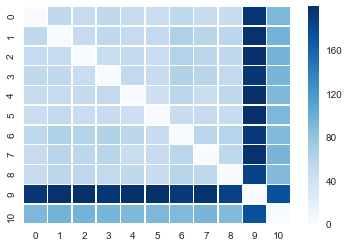

In [7]:
# display the similarity matrix (white=similar, dark blue=different)
sn.heatmap(dist_matrix, cmap='Blues',linewidths=.5)

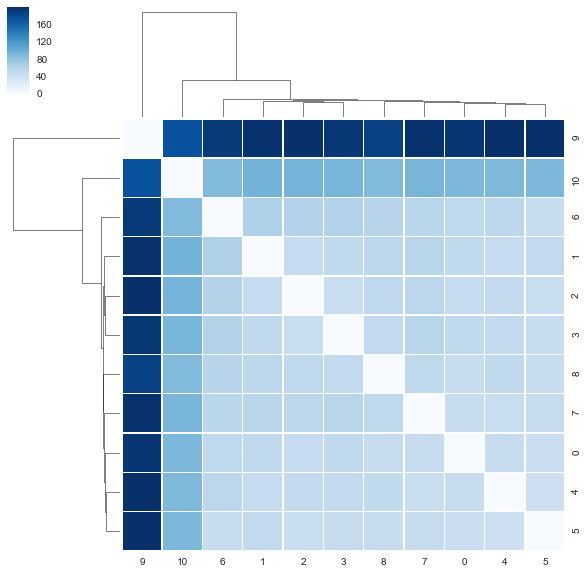

In [8]:
# cluster the chapters together
sn.clustermap(dist_matrix,cmap='Blues',fmt='g',linewidths=.5)

In [9]:
# compare just rows 5 and 9 (chapters 6 & 10) as the far ends of the above 
x = np.array([dtm_matrix.toarray()[5,...],dtm_matrix.toarray()[9,...]])

In [10]:
variance_table=dict()
for t,y in enumerate(np.var(x, axis=0)):
    variance_table[t] = y
    
# sort and display top fifty most variant words
for k,v in sorted(variance_table.items(), key=itemgetter(1), reverse=True)[:50]:
    print(vectorizer.get_feature_names()[k],v)

mr 1722.25
covey 1024.0
time 361.0
did 210.25
master 210.25
slave 210.25
man 169.0
said 132.25
went 132.25
work 132.25
henry 121.0
came 110.25
gave 110.25
hands 110.25
come 100.0
year 90.25
free 81.0
slaves 81.0
told 81.0
long 72.25
day 64.0
freeland 64.0
hand 64.0
home 64.0
just 64.0
way 64.0
white 64.0
freedom 56.25
getting 56.25
like 56.25
morning 56.25
slavery 56.25
think 56.25
woods 56.25
death 49.0
large 49.0
got 42.25
night 42.25
blood 36.0
half 36.0
left 36.0
life 36.0
little 36.0
make 36.0
succeeded 36.0
away 30.25
gardner 30.25
hold 30.25
john 30.25
michael 30.25
